# Olympics Dataset - Case Study Using Pyspark

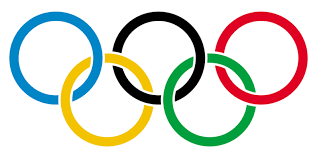

# Introduction

The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.<br>

In this project, we are going to see the Olympics Data analysis using PySpark Library.The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 200 nations participating. Around 110 countiers have won the medals in different category of sports. Totally there are 49 sports. The Dataset contains the olympics winners from year 2000 to 2012.<br>
For every event there are three winners ( like Gold Medal, Silver Medal and Bronze Medal ). Therefore various data is generated. So, by using PySpark I will analyze this data.<br></br>
I am using the Olympic Data set that have been Cleaned in pandas like removing duplicates and special characters that present in features.



### Problem Statement:

Throughout this project, I will explore the Olympics dataset and look at some interesting statistics and then try to find out which country has won more number of Medals in Olympic Games.

## Data Set Characteristics:

Number of Observations in Data set : 8618
<br></br>
Number of features : 10


## Feature Description

|Feature|Data Type|Description|
|--------|---------|-----------|
|Name | Object | Name of the player|
|Age | Integer | Age of the player|
|Country | Object | Name of the country(player belongs to)|
|Year | Integer |  The year of the Olympics that the athlete competed in|
|Date Given | Object | The date which player won the Medal |
|Sports | Object |  The sport that the athlete competed in|
|Gold medal | Integer | No of gold medals won |
|Silver medal | Integer | No of Silver medals won |
|Bronze medal | Integer | No of Bronze medals won |
|Total medals | Integer | No of Total medals won |


## Installing the required Pyspark library

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 53.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0b2143bfb8213ad62c7a6999bdbbfba49bfd4205979dedfce06247bd2bf8bd7b
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Import Dependecies



In [2]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

# #Spark Config
conf = SparkConf().setAppName("Olympix_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Olympix data Analysis').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [3]:
# importing functions from pyspark sql
import pyspark.sql.functions as f

## Reading the CSV file into Data Frame

In [5]:
# Reading the csv file into olympix_df data frame
olympix_df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix(Cleaned data).csv")

In [6]:
# printing 5 records from data frame
olympix_df.show(5)

+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----------+
|           name| age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  MichaelPhelps|23.0|United States|2008|2008-08-24|  Swimming|         8|           0|          0|          8|
|  MichaelPhelps|19.0|United States|2004|2004-08-29|  Swimming|         6|           0|          2|          8|
|  MichaelPhelps|27.0|United States|2012|2012-08-12|  Swimming|         4|           2|          0|          6|
|NatalieCoughlin|25.0|United States|2008|2008-08-24|  Swimming|         1|           2|          3|          6|
|   AlekseyNemov|24.0|       Russia|2000|2000-10-01|Gymnastics|         2|           1|          3|          6|
+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----

##  Total Olympic Sports/games in the dataset.

In [7]:
# selecting all the unique sports in the dataset
n = olympix_df.select("sports").distinct().count()
olympix_df.select("sports").distinct().show(n)

# Printing the total no of sports/games in the dataset
print("Total Number of Sports/games in the dataset :",n)

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

## Total Number of Medals in  each Olympic Sport/Game

In [8]:
# importing the pandas library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# converting the pyspark dataframe to pandas dataframe
olympix_Pdf = olympix_df.toPandas()
olympix_Pdf.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,MichaelPhelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,MichaelPhelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,MichaelPhelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,NatalieCoughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,AlekseyNemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


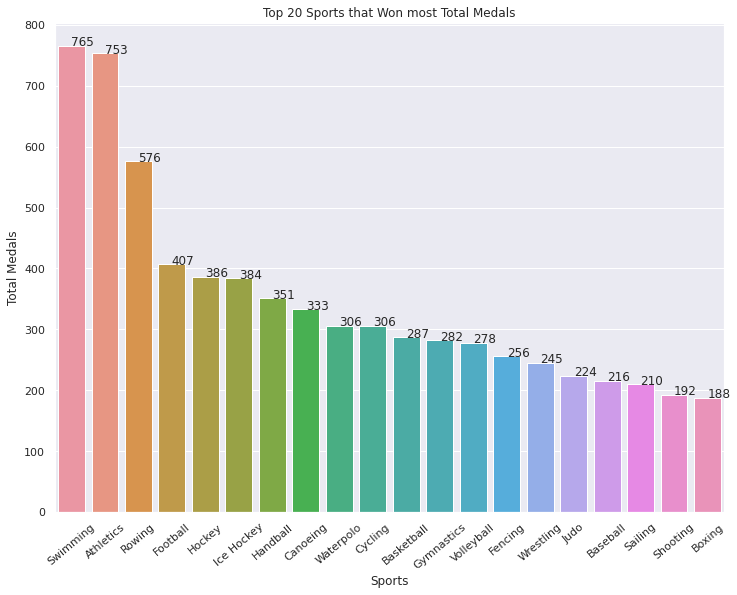

In [10]:
# setting the figure size
sns.set(rc={'figure.figsize':(12,9)})

# Grouping by the sport and picking top 10 sports
top_sports = olympix_Pdf.groupby("sports").agg({'total_medal':sum}).sort_values(['total_medal'],ascending = False).head(20)
top_sports = top_sports.reset_index()

# barplot
sns.barplot(x = 'sports' ,y='total_medal',data = top_sports, order = top_sports.sports)
plt.xticks(rotation = 40)
plt.xlabel("Sports")
plt.ylabel("Total Medals")
plt.title("Top 20 Sports that Won most Total Medals")

for i,df in enumerate(top_sports.total_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

By the above figure, The most medals are won in Swimming sport(765), second most medals are won in Atheletics sport(753) and followed by Rowing sport(576). These are the top three sports in which most medals are won

##  Total Number of Medals won by each Country in Swimming.

In [11]:
# filtering the data where sport is equal to Swimming
Swimming_medal = olympix_df.filter(olympix_df["sports"] == 'Swimming')

# groupby the country and counting total medals
Swimming_medals= Swimming_medal.groupby('country').sum('total_medal').withColumnRenamed("sum(total_medal)","Total Medals in Swimming Sport ")
n = Swimming_medals.count()
Swimming_medals.orderBy(f.desc("sum(total_medal)")).show(n)


+-------------------+-------------------------------+
|            country|Total Medals in Swimming Sport |
+-------------------+-------------------------------+
|      United States|                            267|
|          Australia|                            163|
|        Netherlands|                             46|
|              Japan|                             43|
|             France|                             39|
|              China|                             35|
|            Germany|                             32|
|             Russia|                             20|
|              Italy|                             16|
|      Great Britain|                             11|
|       South Africa|                             11|
|             Sweden|                              9|
|            Hungary|                              9|
|             Brazil|                              8|
|            Ukraine|                              7|
|           Zimbabwe|       

**Observation :**
The Top 3 Countries that won Most No of Medals in Swimming sport
* United States (267)
* Australia (163)
* Netherlands (46)

## Total Number of Medals won by each Country in Skeleton

In [12]:
# filtering the data where sport is equal to Skeleton
skeleton_medal = olympix_df.filter(olympix_df["sports"] == 'Skeleton')

# groupby the country and counting total medals
skeleton_medals = skeleton_medal.groupby('country').sum('total_medal').withColumnRenamed("sum(total_medal)","Total Medals in Skeleton Sport ")
skeleton_medals.orderBy(f.desc("sum(total_medal)")).show()

+-------------+-------------------------------+
|      country|Total Medals in Skeleton Sport |
+-------------+-------------------------------+
|       Canada|                              4|
|Great Britain|                              3|
|  Switzerland|                              3|
|United States|                              3|
|      Germany|                              2|
|       Russia|                              1|
|      Austria|                              1|
|       Latvia|                              1|
+-------------+-------------------------------+



**Observation :**
* Canada has the most No of Total medals in Skeleton sport(4), followed by Great Britain(3), Switzerland(3), United States(3), Germany(2), Russia(1), Austrila(1) and Latvia(1).<br>
* These are the 8 countries that have won Total medals in Skeleton sport.
* Other Countries not won any medal in skeleton sport.

## Total Number of medals that the US won yearly.

In [13]:
# filtering the data where Country is equal to United States
US_medal = olympix_df.filter(olympix_df["country"] == 'United States')

# groupby the year and counting total medals
US_medals = US_medal.groupby('year').sum('total_medal').withColumnRenamed("sum(total_medal)","Total Number of medals of US won yearly")
US_medals.orderBy(f.asc('year')).show()

+----+---------------------------------------+
|year|Total Number of medals of US won yearly|
+----+---------------------------------------+
|2000|                                    243|
|2002|                                     84|
|2004|                                    265|
|2006|                                     52|
|2008|                                    317|
|2010|                                     97|
|2012|                                    254|
+----+---------------------------------------+



**United States won most Total Number of medals in the year 2008 (317).** 

## Total Number of Medals won by each Country

In [14]:
# groupby the country and counting total medals
country_medal = olympix_df.groupby('country').sum('total_medal').withColumnRenamed('sum(total_medal)','Total Medals')
n = country_medal.count()

# sorting total medals in descending order 
country_medal.orderBy(f.desc('sum(total_medal)')).show(n)

+--------------------+------------+
|             country|Total Medals|
+--------------------+------------+
|       United States|        1312|
|              Russia|         768|
|             Germany|         629|
|           Australia|         609|
|               China|         530|
|              Canada|         370|
|               Italy|         331|
|       Great Britain|         322|
|              France|         318|
|         Netherlands|         318|
|         South Korea|         308|
|               Japan|         282|
|              Brazil|         218|
|               Spain|         205|
|              Norway|         192|
|                Cuba|         188|
|              Sweden|         181|
|             Hungary|         145|
|             Ukraine|         143|
|           Argentina|         139|
|             Romania|         123|
|             Finland|         118|
|             Belarus|          97|
|         Switzerland|          93|
|             Austria|      

**Observation :**
United States has Won the most total medals (1312).

## Oldest Athlete in the olympics

In [26]:
# Finding the age of the Oldest athlete in olympics
n = olympix_df.select(f.max('age'))
print("Maximum age in the olympics :",n.collect())

Maximum age in the dataset : [Row(max(age)=61.0)]


In [28]:
# filter the athlete with highest age
oldest = olympix_df.filter(olympix_df['age'] == 61.0)
oldest.show()

+--------------------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|                name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|NiklausSchurtenbe...|61.0| Canada|2008|2008-08-24|Equestrian|         0|           1|          0|          1|
+--------------------+----+-------+----+----------+----------+----------+------------+-----------+-----------+



The Oldest Athlete in the olympics is **Niklaus Schurtenberger** and he is from **Canada** Country.